# Wheat Future Market Analysis Report

## Market Info
#### Symbol Convention
[Base Symbol]+[Month Code]+[Year]

- For example, ```ZWN25``` is the Chicago soft red winter wheat future with expiration in July 2025.
- ```ZW=F``` refers to the **nearest to expiration** Chicago soft red winter wheat futures contract. For example, from March to April, the ```ZW=F``` tracks the May futures ```ZWK```.

#### Quick Summary

| Wheat Type                | Symbol | Key Growing Regions    | Primary Uses                       | Planting Season | Harvest Season | Vulnerable to                              | Expiry Month                           |
|---------------------------|--------|------------------------|------------------------------------|-----------------|----------------|--------------------------------------------|----------------------------------------|
| **Soft Red Winter Wheat** | `ZW`   | IL, IN, OH, MO, KY     | Pastries, cakes, cookies           | Sep-Nov         | May-Jul        | cold damage & drought                      | Mar, May, Jul, Sep, Dec (H, K, N, U Z) |
| **Hard Red Winter Wheat** | `KE`   | Central U.S. (Plains)  | Bread, rolls, all-purpose flour    | Sep-Oct         | Jun-Jul        | cold damage & drought                      | Mar, May, Jul, Sep, Dec (H, K, N, U Z) |
| **Hard Red Spring Wheat** | `MW`   | Northern U.S. & Canada | Premium bread, bagels, pizza dough | Apr-May         | Aug-Sep        | wet planting conditions summer heat stress | Mar, May, Jul, Sep, Dec (H, K, N, U Z) |

#### Geopolitical & Export Demand
- Hard Red Winter & Spring Wheat are key U.S. exports (buyers include China, Mexico, and Egypt).
- Russia and Ukraine produce competing wheat types, affecting global prices.

#### Last trading day
- The business day before the 15th calendar day of the contract month. Usually, it would be the 14th of that day at 1:20pm CT.
- The wheat is already in the warehouse before the expiration date. Once the ownership is transferred to the long trader, the long trader must pay the storage fees.
- After the last trading day, the buyer of the contract must take delivery. This will incur daily warehouse fee, handling fees and delivery fees.
- Most trades will close their positions before the First Notice day, or the last trading day.

In [1]:
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import numpy as np

api_key = "7BACC84D-4D4E-31CE-9828-0EAF5D6338DB"
USDA_url = 'https://quickstats.nass.usda.gov/api/api_GET/'

## Market Data Analysis (SRW)

In [20]:
# Obtaining the nearest to expiration wheat future
SRW = yf.Ticker("ZW=F")
HRW = yf.Ticker("KE=F")
SRW_data = SRW.history(start ="2019-01-01", end ="2024-12-31")
HRW_data = HRW.history(start ="2019-01-01", end ="2024-12-31")
SRW_data['Year'] = SRW_data.index.year
SRW_data['Month'] = SRW_data.index.month
SRW_data['Day'] = SRW_data.index.day
SRW_data['Day_Of_Year'] = SRW_data.index.dayofyear
HRW_data['Year'] = HRW_data.index.year
HRW_data['Month'] = HRW_data.index.month
HRW_data['Day'] = HRW_data.index.day
HRW_data['Day_Of_Year'] = HRW_data.index.dayofyear

### Trading Volume Analysis

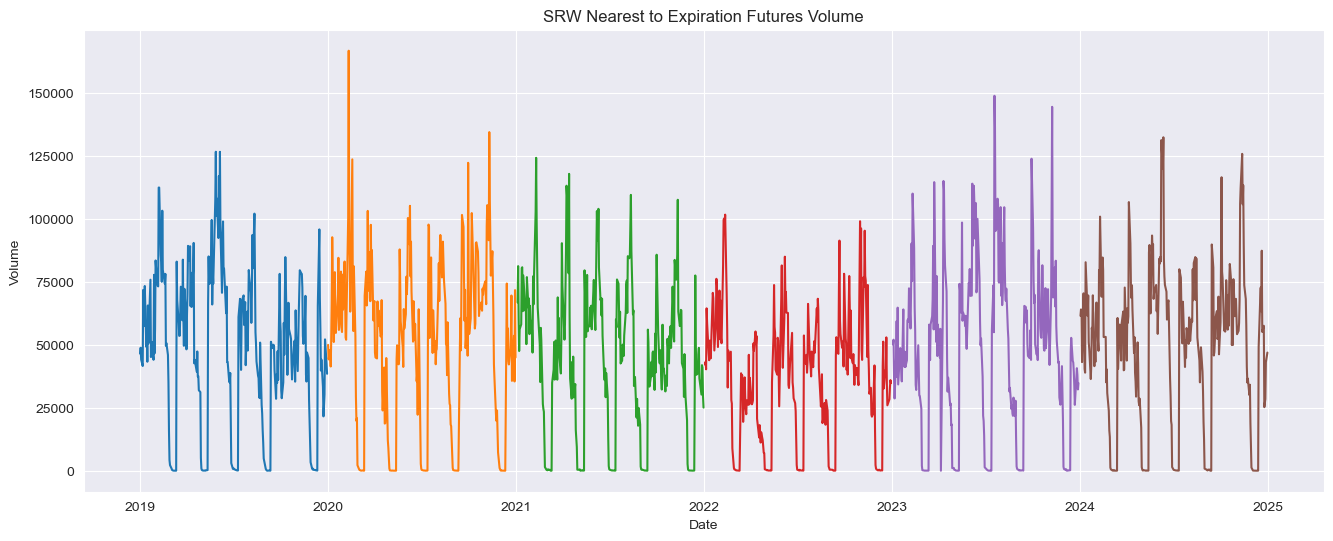

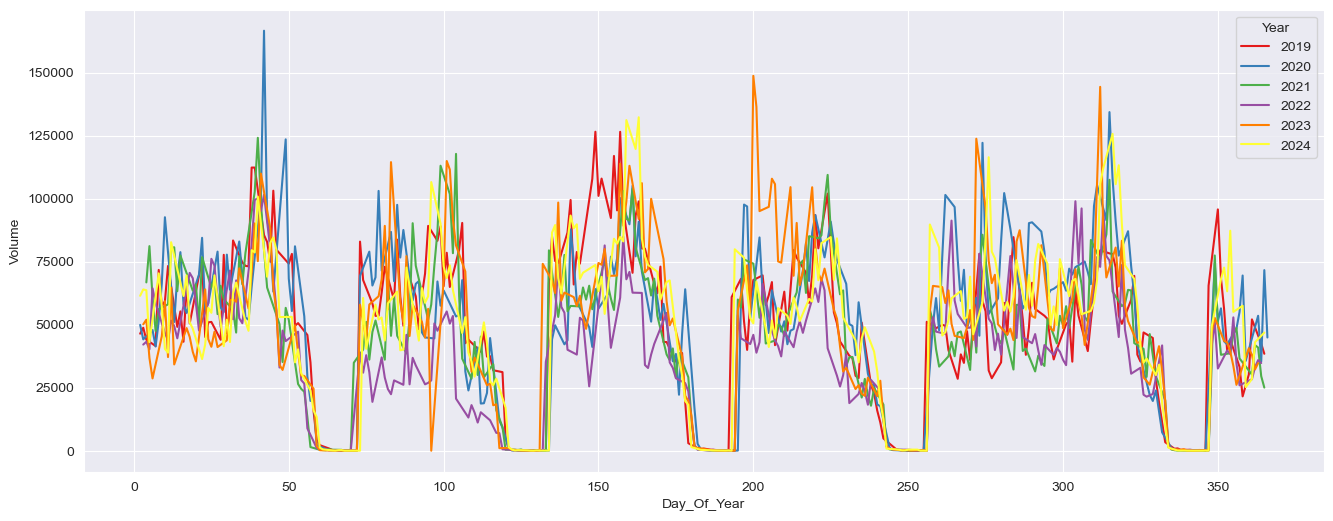

In [9]:
plt.figure(figsize = (16,6))
plt.title("SRW Nearest to Expiration Futures Volume")
for year in SRW_data['Year'].unique():  # Loop through each unique year
    yearly_data = SRW_data[SRW_data['Year'] == year]
    sns.lineplot(x = 'Date', y = 'Volume', data = yearly_data)
plt.show()

plt.figure(figsize = (16,6))
sns.lineplot(x = 'Day_Of_Year', y = 'Volume', data = SRW_data, hue ='Year', palette='Set1')
plt.show()

There are 5 almost zero volume period in each year. That is exactly the days after the last trading days. We will remove those data when analyzing the volume.

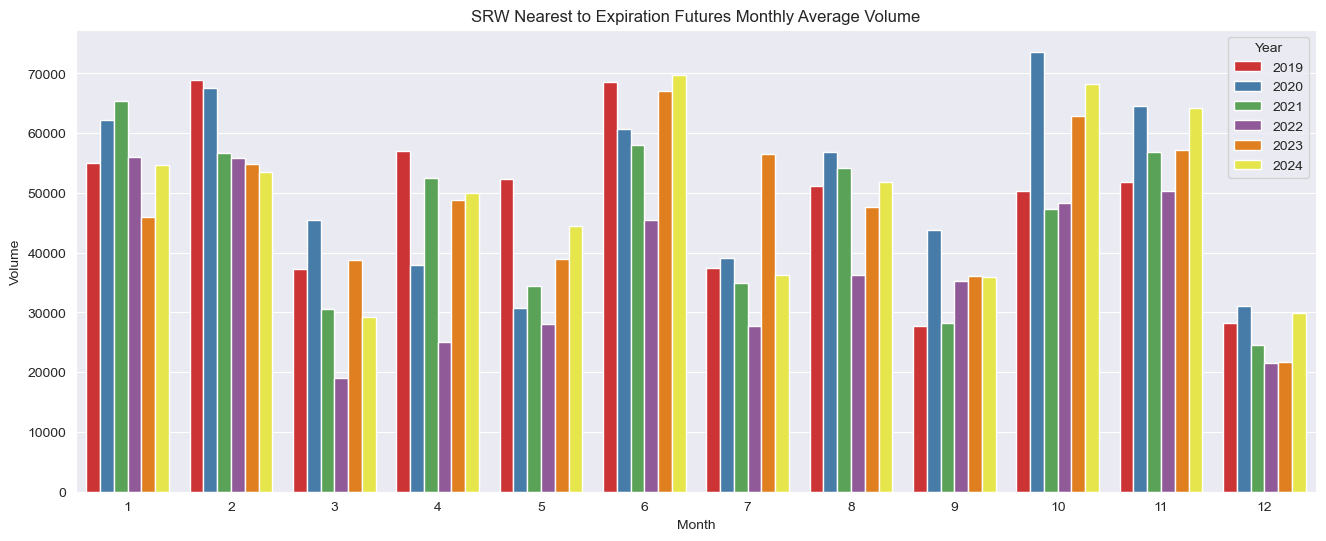

In [12]:
monthly_average = SRW_data.groupby(['Year', 'Month']).Volume.agg('mean').reset_index()

plt.figure(figsize = (16,6))
plt.title("SRW Nearest to Expiration Futures Monthly Average Volume")
sns.barplot(x = 'Month', y = 'Volume', data = monthly_average, hue = 'Year', palette='Set1')
# sns.barplot(x = 'Month', y = 'Volume', data = monthly_average)
plt.show()

The trading volume in Mar, May, July, Sept, Dec are low. This is partially because those month are the expiration month, and the data are coming from the nearest to expiration Futures. After the final trading day, no transactions are allowed.

### Price Analysis

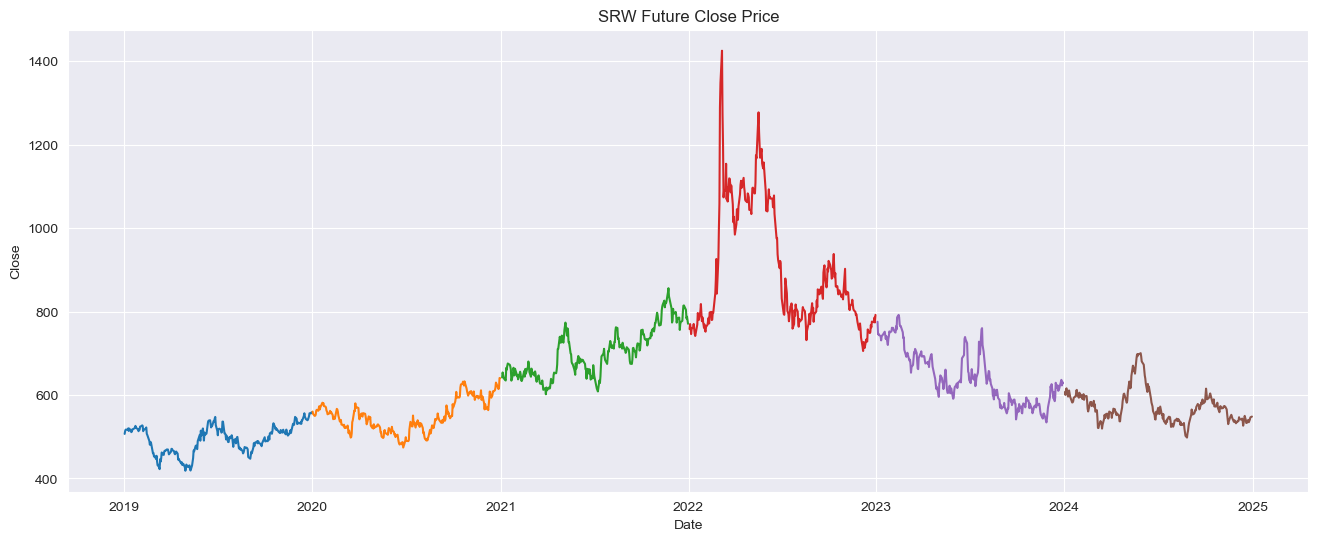

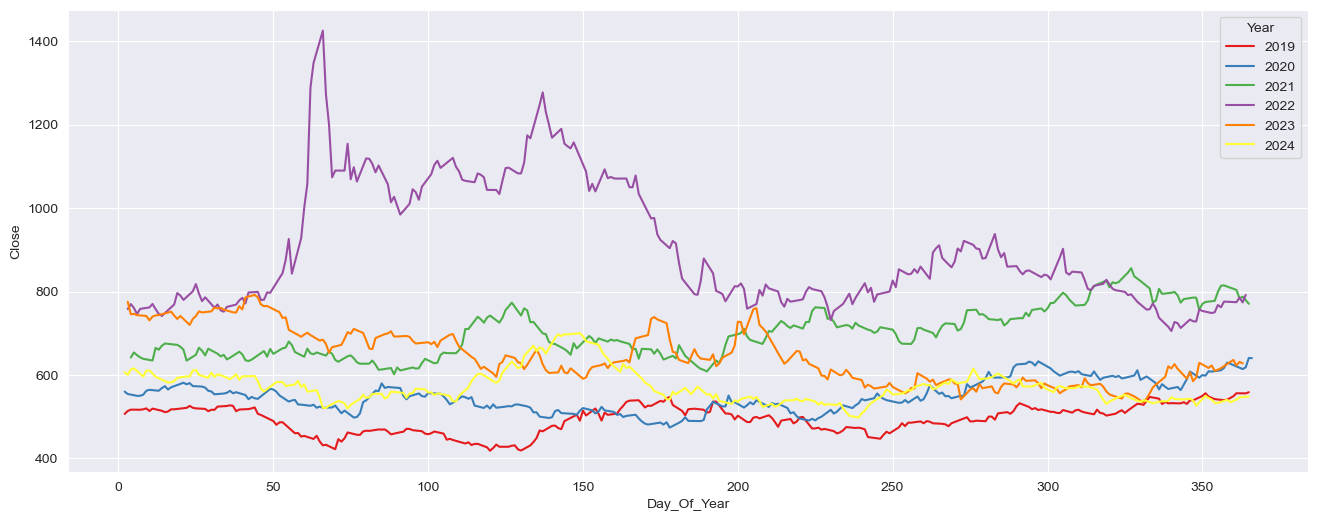

In [5]:
plt.figure(figsize = (16,6))
plt.title("SRW Nearest to Expiration Future Close Price")
for year in SRW_data['Year'].unique():  # Loop through each unique year
    yearly_data = SRW_data[SRW_data['Year'] == year]
    sns.lineplot(x = 'Date', y = 'Close', data = yearly_data)
plt.show()

plt.figure(figsize = (16,6))
sns.lineplot(x = 'Day_Of_Year', y = 'Close', data = SRW_data, hue ='Year', palette='Set1')
plt.show()

Almost no seasonality in the price data.

C:\Users\tianhao\AppData\Local\Temp\ipykernel_7788\1914232185.py:6: RuntimeWarning: divide by zero encountered in divide
  plt.plot(1 / frequencies, power)


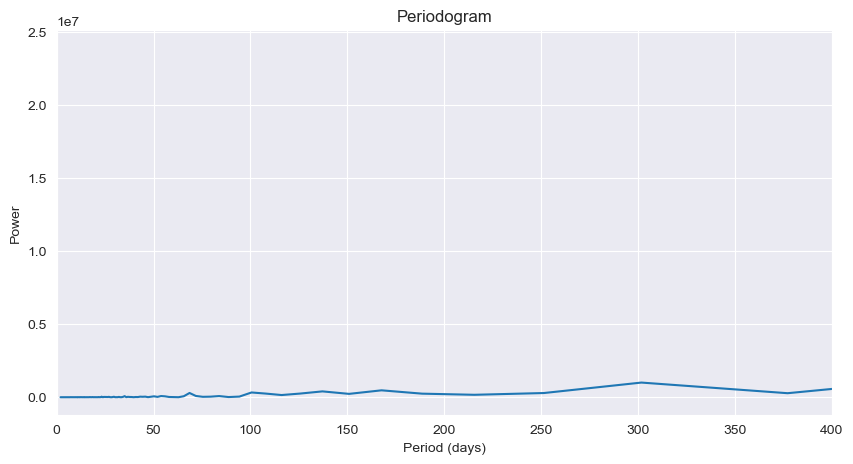

In [87]:
from scipy.signal import periodogram

frequencies, power = periodogram(SRW_data['Close'].dropna())

plt.figure(figsize=(10, 5))
plt.plot(1 / frequencies, power)
plt.xlabel("Period (days)")
plt.ylabel("Power")
plt.title("Periodogram")
plt.xlim(0, 400)  # Limit x-axis to reasonable periods
plt.show()

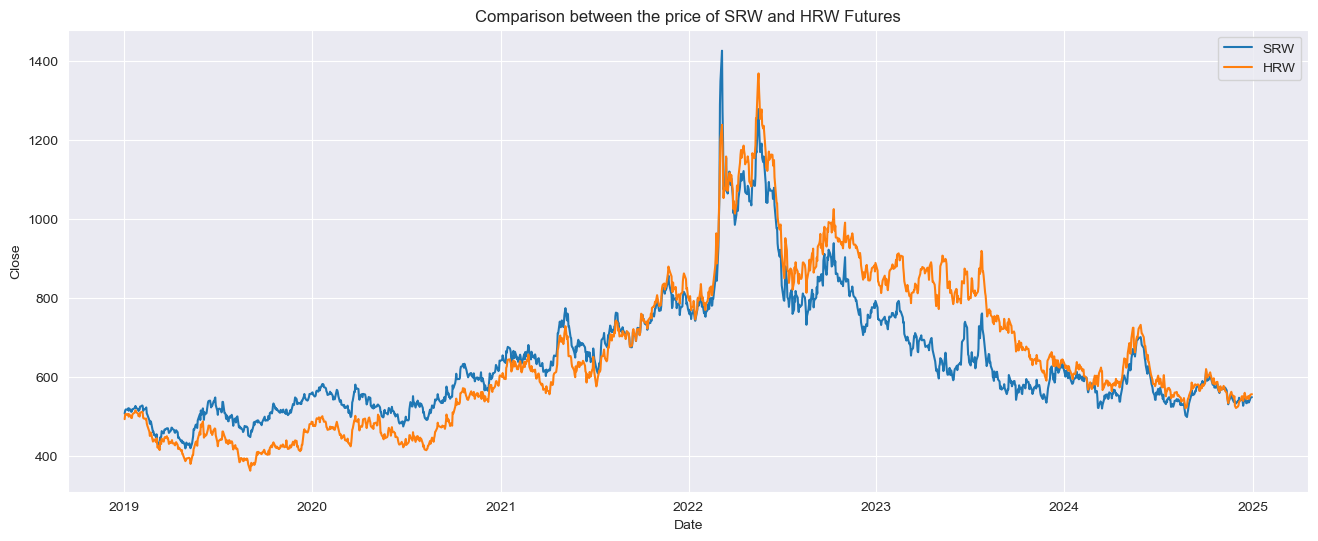

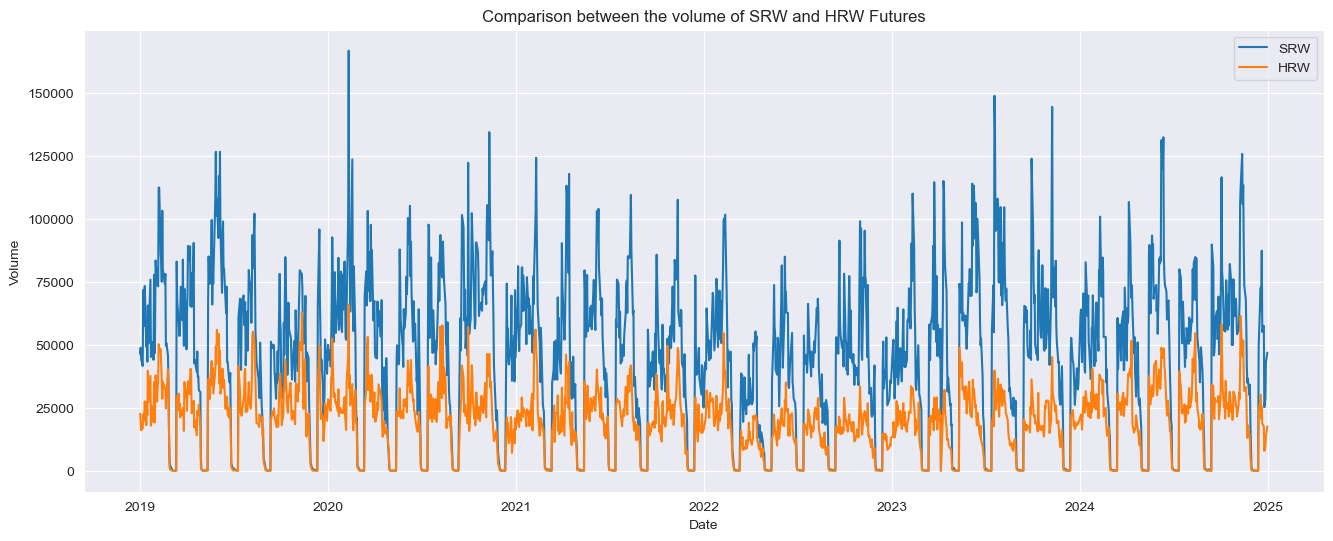

In [49]:
plt.figure(figsize=(16, 6))
plt.title("Comparison between the price of SRW and HRW Futures")
sns.lineplot(x = 'Date', y = 'Close', data = SRW_data, label = "SRW")
sns.lineplot(x = 'Date', y = 'Close', data = HRW_data, label = "HRW")
plt.show()

plt.figure(figsize=(16, 6))
plt.title("Comparison between the volume of SRW and HRW Futures")
sns.lineplot(x = 'Date', y = 'Volume', data = SRW_data, label = "SRW")
sns.lineplot(x = 'Date', y = 'Volume', data = HRW_data, label = "HRW")
plt.show()

The SRW volume dominates the HRW volume. Their price is moving in a similar pattern.

### Other wheat indexes

<Axes: xlabel='Date', ylabel='Close'>

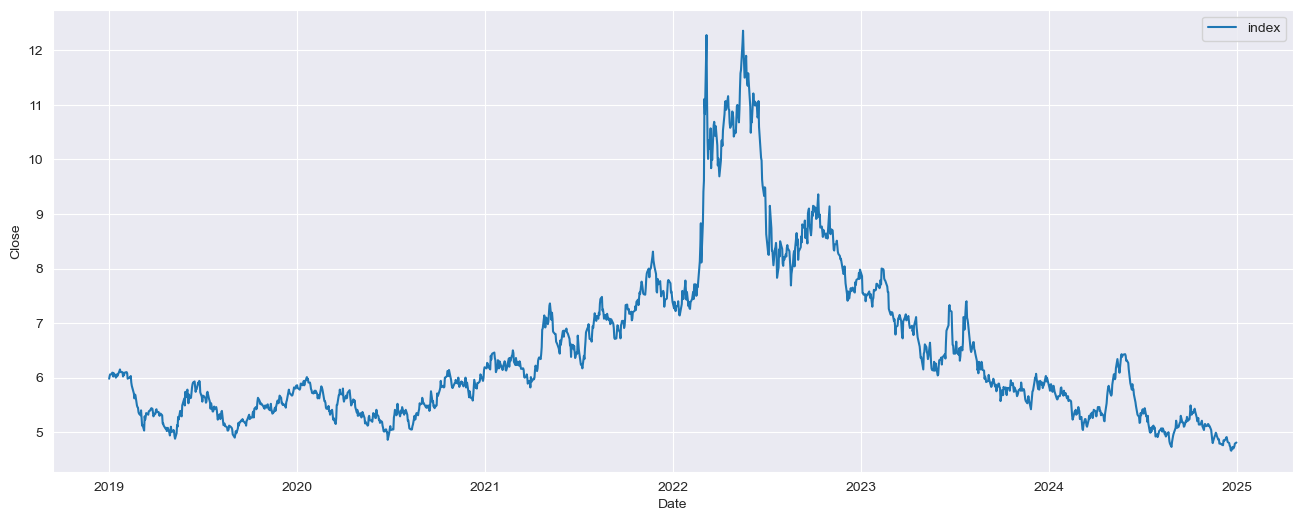

In [60]:
# This index data is almost a scaled version of the wheat price
ticker = 'WEAT'
data = yf.Ticker(ticker).history(start ="2019-01-01", end ="2024-12-31")

plt.figure(figsize = (16,6))
sns.lineplot(x = 'Date', y = 'Close', data = data, label = "index")
# sns.lineplot(x = 'Date', y = 'Close', data = SRW_data, label = "SRW")

### Comparing futures with different expiry month

<Axes: xlabel='Date', ylabel='Close'>

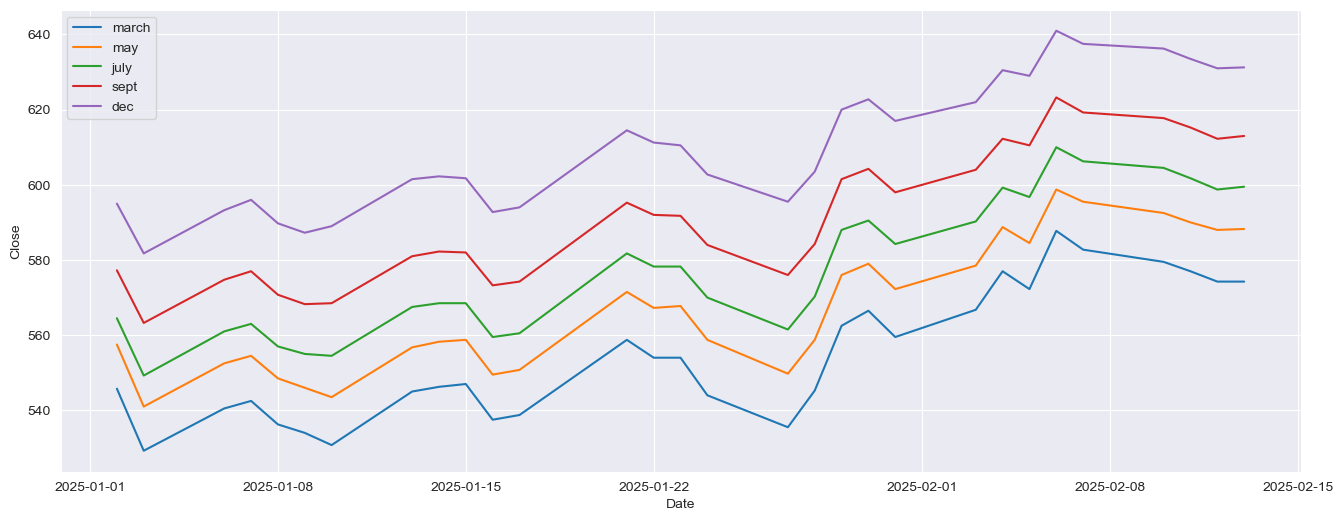

In [82]:
march = yf.Ticker("ZWH25.CBT").history(start ="2025-01-01")
may = yf.Ticker("ZWK25.CBT").history(start ="2025-01-01")
july = yf.Ticker("ZWN25.CBT").history(start ="2025-01-01")
sept = yf.Ticker("ZWU25.CBT").history(start ="2025-01-01")
dec = yf.Ticker("ZWZ25.CBT").history(start ="2025-01-01")


plt.figure(figsize = (16,6))
sns.lineplot(x = 'Date', y = 'Close', data = march, label = "march")
sns.lineplot(x = 'Date', y = 'Close', data = may, label = "may")
sns.lineplot(x = 'Date', y = 'Close', data = july, label = "july")
sns.lineplot(x = 'Date', y = 'Close', data = sept, label = "sept")
sns.lineplot(x = 'Date', y = 'Close', data = dec, label = "dec")

### Contango Market Structure
- **Contango** is a market condition where futures contracts with later expiration dates trade at higher prices than near-term contracts.

**Why Does Contango Happen? (Cost-of-Carry Model)**:
1. Storage Costs
    - If wheat is stored in a CME-approved warehouse, the holder incurs storage fees.
    - Since May wheat futures require holding wheat longer than March, storage costs increase over time, contributing to a higher May price.
2. Financing Costs (Interest Rates)
3. Insurance & Transportation Costs
    - If wheat is stored for longer periods, it requires insurance against spoilage, theft, or contamination.
4. Market Expectations
    - If traders expect wheat prices to rise in the future, they may bid up prices for later contracts.

## Data from the USDA (United States Department of Agriculture)

In [52]:
params = {
    'key': api_key,
    'commodity_desc': 'WHEAT',
    'statisticcat_desc': 'PRODUCTION',
    'agg_level_desc': 'STATE',
#    'class_desc': 'WINTER, RED, SOFT',
    'year__GE': 2012,  # Adjust the year range as needed
    'format': 'JSON',
    'domaincat_desc': 'NOT SPECIFIED',
}

response = requests.post(USDA_url, params=params)

SRW_percentage = pd.DataFrame()
HRW_percentage = pd.DataFrame()
HRS_percentage = pd.DataFrame()
df = pd.DataFrame()

if response.status_code == 200:
    data = response.json()

    # Convert JSON response to DataFrame
    df = pd.DataFrame(data['data'])  # Assuming 'data' is the key containing records
    df['year'] = pd.to_numeric(df['year'])
    df['Value'] = df['Value'].str.replace(',', '', regex=True)
    df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

    # Select only relevant columns
    SRW_percentage = df[df['class_desc'] == 'WINTER, RED, SOFT'][['year', 'state_name', 'class_desc' ,'Value', 'unit_desc']]
    HRW_percentage = df[df['class_desc'] == 'WINTER, RED, HARD'][['year', 'state_name', 'class_desc' ,'Value', 'unit_desc']]
    HRS_percentage = df[df['class_desc'] == 'SPRING, RED, HARD'][['year', 'state_name', 'class_desc' ,'Value', 'unit_desc']]
else:
    print(f"Error: {response.status_code}")

In [58]:
production = df[df['class_desc'] == 'ALL CLASSES']
result = production[(production['state_name'] == 'KANSAS') & (production['unit_desc'] == 'BU')]
result[['Value', 'unit_desc', 'year' ,'source_desc', 'short_desc', 'domaincat_desc', 'state_name']]

,Value,unit_desc,year,source_desc,short_desc,domaincat_desc,state_name
42,246471132.0,BU,2022,CENSUS,"WHEAT - PRODUCTION, MEASURED IN BU",NOT SPECIFIED,KANSAS
43,319315035.0,BU,2017,CENSUS,"WHEAT - PRODUCTION, MEASURED IN BU",NOT SPECIFIED,KANSAS
44,359484644.0,BU,2012,CENSUS,"WHEAT - PRODUCTION, MEASURED IN BU",NOT SPECIFIED,KANSAS
1065,307450000.0,BU,2024,SURVEY,"WHEAT - PRODUCTION, MEASURED IN BU",NOT SPECIFIED,KANSAS
1066,201250000.0,BU,2023,SURVEY,"WHEAT - PRODUCTION, MEASURED IN BU",NOT SPECIFIED,KANSAS
1067,244200000.0,BU,2022,SURVEY,"WHEAT - PRODUCTION, MEASURED IN BU",NOT SPECIFIED,KANSAS
1068,364000000.0,BU,2021,SURVEY,"WHEAT - PRODUCTION, MEASURED IN BU",NOT SPECIFIED,KANSAS
1069,281250000.0,BU,2020,SURVEY,"WHEAT - PRODUCTION, MEASURED IN BU",NOT SPECIFIED,KANSAS
1070,348400000.0,BU,2019,SURVEY,"WHEAT - PRODUCTION, MEASURED IN BU",NOT SPECIFIED,KANSAS
1071,277400000.0,BU,2018,SURVEY,"WHEAT - PRODUCTION, MEASURED IN BU",NOT SPECIFIED,KANSAS
